In [11]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Datasets/healthcare-dataset-stroke-data.csv")
df = df.drop(['id'], axis=1)
print(df.shape)
df.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

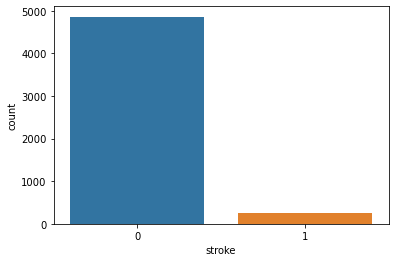

In [39]:
sns.countplot(data=df, x="stroke")

## 1. Continuous variable

In [6]:
continuous_feature_name = []
for feature in df:
    if df.dtypes[feature] == 'float64':
        continuous_feature_name.append(feature)
df[continuous_feature_name].head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


Text(0.5, 1.0, 'bmi_stroke')

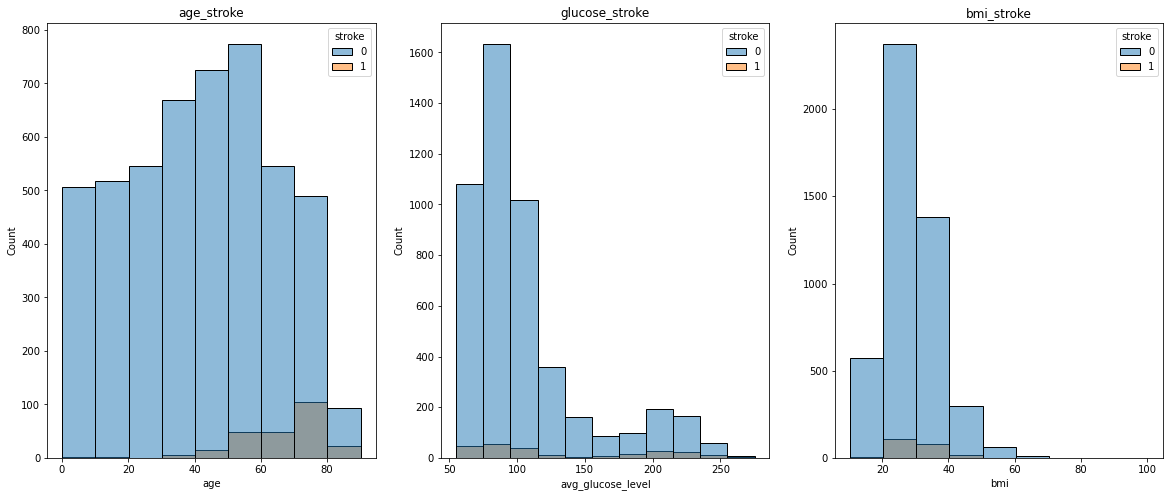

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
sns.histplot(ax=axes[0], x=df.age, hue=df.stroke, binwidth=10)
axes[0].set_title("age_stroke")

sns.histplot(ax=axes[1], x=df.avg_glucose_level, hue=df.stroke, binwidth=20)
axes[1].set_title("glucose_stroke")

sns.histplot(ax=axes[2], x=df.bmi, hue=df.stroke, binwidth=10)
axes[2].set_title("bmi_stroke")

<AxesSubplot:xlabel='age', ylabel='stroke'>

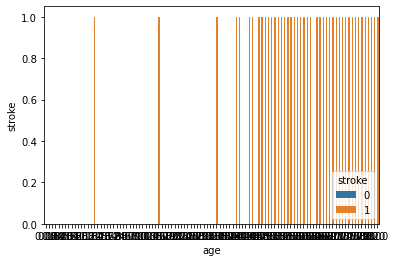

In [8]:
sns.barplot(x=df.age, y=df.stroke, hue=df.stroke)